In [22]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

%matplotlib inline

In [23]:
df = pd.read_excel('Assam.xlsx')

In [24]:
df

,Year,Life Expectancy
0,1991,56.7
1,1992,56.9
2,1993,57.2
3,1994,57.3
4,1995,57.4
5,1996,57.5
6,1997,58.0
7,1998,59.0
8,1999,60.6
9,2000,61.0


In [25]:
scaler = MinMaxScaler()
df[['Life Expectancy']] = scaler.fit_transform(df[['Life Expectancy']])

In [26]:
df1 = df[['Year','Life Expectancy']]

In [27]:
df1


,Year,Life Expectancy
0,1991,0.000000
1,1992,0.023256
2,1993,0.058140
3,1994,0.069767
4,1995,0.081395
5,1996,0.093023
6,1997,0.151163
7,1998,0.267442
8,1999,0.453488
9,2000,0.500000


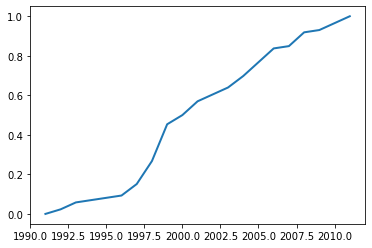

In [28]:
plt.plot(df1['Year'],df1['Life Expectancy'],linewidth=2.0)

In [29]:

X = df1['Year'].values.reshape(-1,1)
y = df1['Life Expectancy'].values.reshape(-1,1)
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 2) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y) 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
dfTest = pd.DataFrame({'Year':[2015,2018,2021,2024]})

In [31]:
pred = []
for i in dfTest['Year']:
    pred.append(lin2.predict(poly.fit_transform([[i]]))[0][0])

In [32]:
pred

[1.2497593142247752, 1.3928220681143557, 1.5304297374736962, 1.662582322303706]

In [33]:
dfTest['Life Expectancy'] = pred

In [34]:
df1 = df1.append(dfTest,ignore_index=True)

In [35]:
df1

,Year,Life Expectancy
0,1991,0.000000
1,1992,0.023256
2,1993,0.058140
3,1994,0.069767
4,1995,0.081395
5,1996,0.093023
6,1997,0.151163
7,1998,0.267442
8,1999,0.453488
9,2000,0.500000


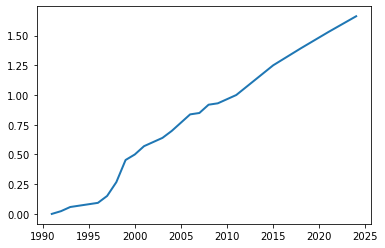

In [36]:
plt.plot(df1['Year'],df1['Life Expectancy'],linewidth=2.0)

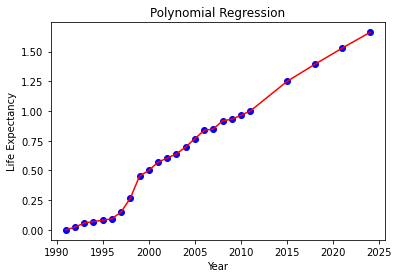

In [37]:
# Visualising the Polynomial Regression results
plt.scatter(df1['Year'], df1['Life Expectancy'], color = 'blue') 
  
plt.plot(df1['Year'], df1['Life Expectancy'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('Life Expectancy') 
  
plt.show()

# WRT Unproportioned Scale

In [38]:
pred = []
for i in df1['Life Expectancy']:
    pred.append(round(scaler.inverse_transform([[i]])[0][0]))

In [39]:
pred

[57.0,
 57.0,
 57.0,
 57.0,
 57.0,
 58.0,
 58.0,
 59.0,
 61.0,
 61.0,
 62.0,
 62.0,
 62.0,
 63.0,
 63.0,
 64.0,
 64.0,
 65.0,
 65.0,
 65.0,
 65.0,
 67.0,
 69.0,
 70.0,
 71.0]

In [40]:
df1['Life Expectancy'] = pred

In [41]:
df1

,Year,Life Expectancy
0,1991,57.0
1,1992,57.0
2,1993,57.0
3,1994,57.0
4,1995,57.0
5,1996,58.0
6,1997,58.0
7,1998,59.0
8,1999,61.0
9,2000,61.0


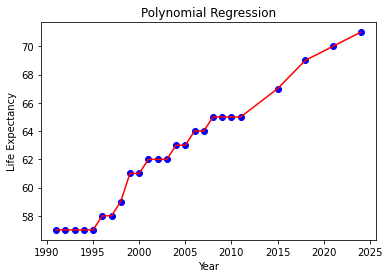

In [42]:
# Visualising the Polynomial Regression results 
plt.scatter(df1['Year'], df1['Life Expectancy'], color = 'blue') 
  
plt.plot(df1['Year'], df1['Life Expectancy'], color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Year') 
plt.ylabel('Life Expectancy') 
  
plt.show() 